# Light Gradient Boosting Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from lightgbm import LGBMRegressor
from matplotlib.markers import MarkerStyle
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    root_mean_squared_error,
    root_mean_squared_log_error,
)
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../../../../Datasets/IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [6]:
df.columns

Index(['Temperature', 'Revenue'], dtype='object')

In [7]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

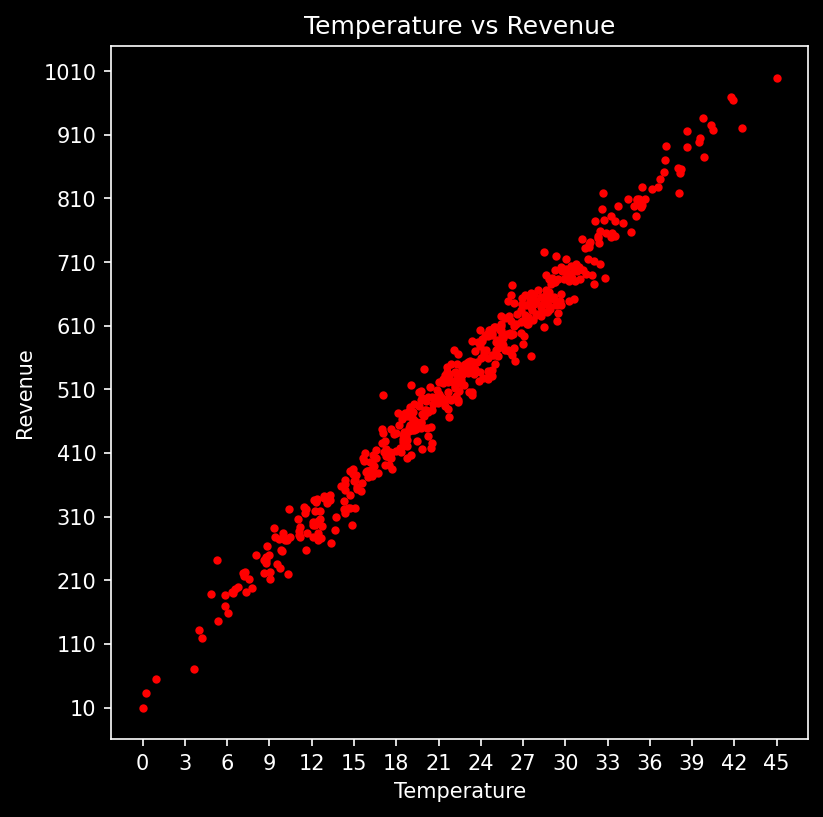

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
Temperature = df["Temperature"]
Revenue = df["Revenue"]
plt.scatter(Temperature, Revenue, marker=MarkerStyle("."), color="red")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Temperature_vs_Revenue.png", bbox_inches="tight")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
lgbr = LGBMRegressor(num_leaves=10, max_depth=10, force_col_wise=True)
lgbr.fit(X_train, y_train)
y_pred = lgbr.predict(X_test)

[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 1
[LightGBM] [Info] Start training from score 520.713236


In [12]:
print("The coefficient of determination :", r2_score(y_test, y_pred))  # type: ignore
adjusted_r2_score = 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (  # type: ignore
    len(y_test) - X_test.shape[1] - 1
)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9665873694184761
The adjusted coefficient of determination : 0.9658912729480277


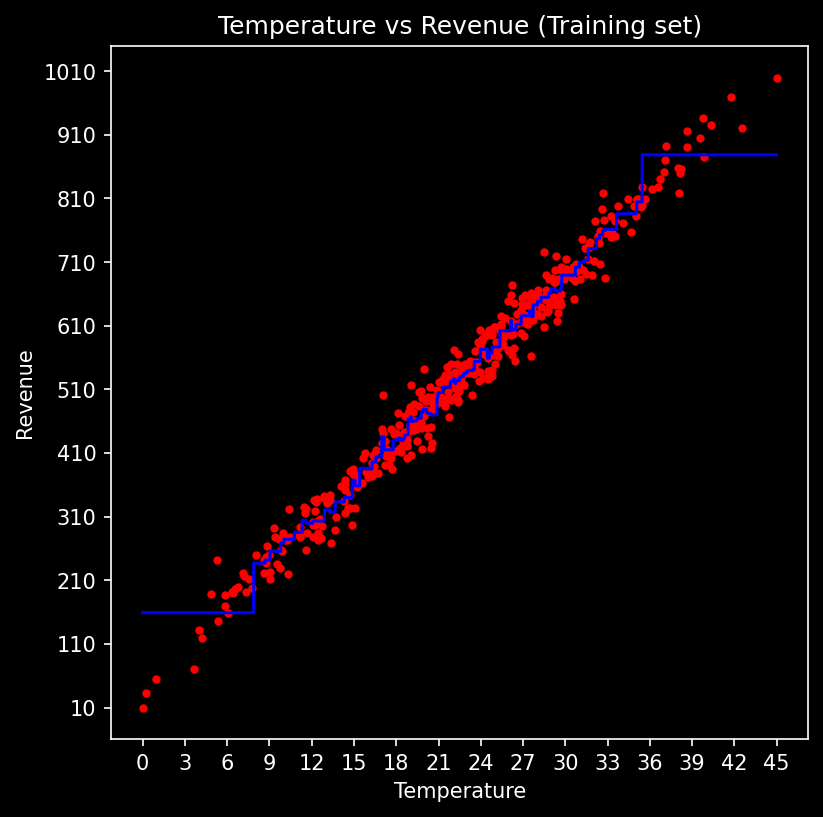

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_train_grid = np.arange(X_train.min(), X_train.max(), 0.01)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker=MarkerStyle("."), color="red")
plt.plot(X_train_grid, lgbr.predict(X_train_grid), color="blue")  # type: ignore
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue (Training set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Training_set.png", bbox_inches="tight")

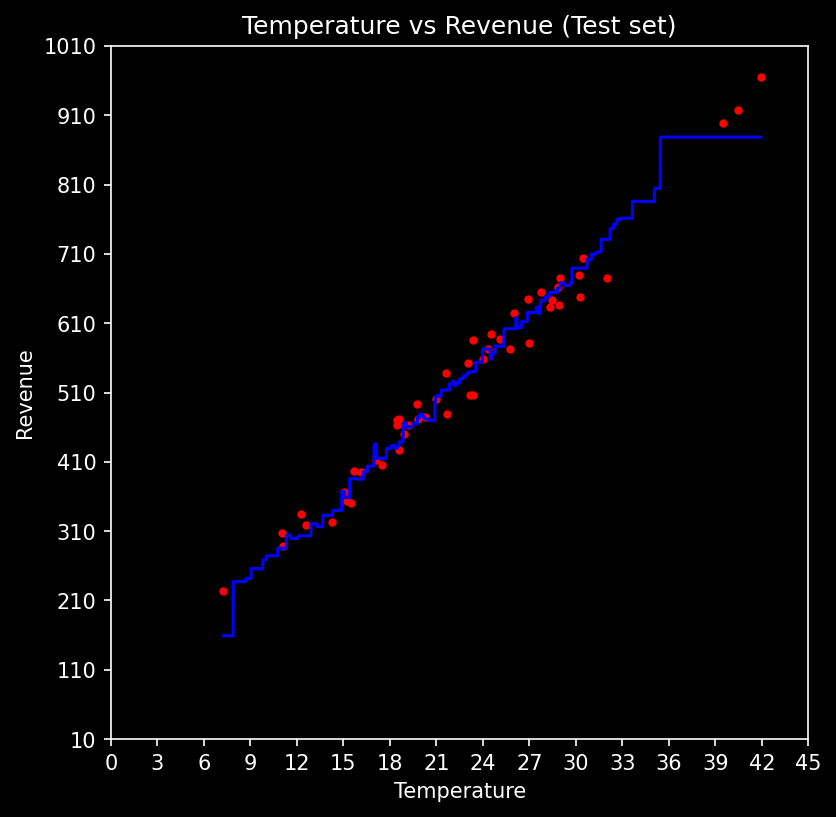

In [14]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_test_grid = np.arange(X_test.min(), X_test.max(), 0.01)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker=MarkerStyle("."), color="red")
plt.plot(X_test_grid, lgbr.predict(X_test_grid), color="blue")  # type: ignore
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue (Test set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Test_set.png", bbox_inches="tight")

In [15]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))  # type: ignore
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))  # type: ignore
print(
    "Root Mean Squared Error (RMSE) :",
    root_mean_squared_error(y_test, y_pred),  # type: ignore
)
print("Mean Squared Log Error (MSLE) :", mean_squared_log_error(y_test, y_pred))  # type: ignore
print(
    "Root Mean Squared Log Error (RMSLE) :",
    root_mean_squared_log_error(y_test, y_pred),  # type: ignore
)
print(
    "Mean Absolute Percentage Error (MAPE) :",
    mean_absolute_percentage_error(y_test, y_pred),  # type: ignore
)

Mean Absolute Error (MAE) : 22.478017767335768
Mean Squared Error (MSE) : 816.9375393753402
Root Mean Squared Error (RMSE) : 28.582119224706556
Mean Squared Log Error (MSLE) : 0.0046798992895263816
Root Mean Squared Log Error (RMSLE) : 0.06840978942758398
Mean Absolute Percentage Error (MAPE) : 0.04539946959658771


In [16]:
dump(lgbr, "../../../../Models/lightGradientBoostingRegressor.joblib")

['../../../../Models/lightGradientBoostingRegressor.joblib']